**<h1 align=center><font size = 5>Object Detection with Faster R-CNN</font></h1>**

<br>

<img src="https://cdn.shopify.com/s/files/1/0533/4158/5598/articles/how-to-run-tensorflow-object-detection-in-real-time-with-raspberry-v2-csi-camera-on-nvidia-jetson-nano-447485.jpg?v=1659971239" width=1000 height=500 alt="https://www.forecr.io/blogs/ai-algorithms/how-to-run-tensorflow-object-detection-in-real-time-with-raspberry-v2-csi-camera-on-nvidia%C2%AE-jetson%E2%84%A2-nano%E2%84%A2">

<small>Picture Source: <a href="https://www.forecr.io/blogs/ai-algorithms/how-to-run-tensorflow-object-detection-in-real-time-with-raspberry-v2-csi-camera-on-nvidia%C2%AE-jetson%E2%84%A2-nano%E2%84%A2">forecr</a>

<br>

<h2>Description</h2>

<br>

<h3>Context</h3>

<p>Faster R-CNN is a method for object detection that uses region proposal. In this lab, you will use Faster R-CNN pre-trained on the coco dataset. You will learn how to detect several objects by name and to use the likelihood of the object prediction being correct.</p>

<br>

<h3>Training for Object Detection</h3>
<p>Object detection is based on two principles. The first is the learnable parameters in the created rectangle (box), and the second is the size of the created box (coordinate information). While the model is being trained, ground truth and prediction values ​​are evaluated with the difference of squares. Evaluations depend on the size of the ground truth rectangles created through functions. The functions calculate the difference between the ground truth box and the predicted rectangle.</p>

<br>

<h3>Object Detection Models</h3>

<p>Types of Object Detection Sliding window techniques are slow. Fortunately, there are two major types of object detection that speed up the process. <i>Region-based object detection</i> breaks up the image into regions and performs a prediction, while <i>Single-Stage object detection </i>uses the entire image.</p>

<ul>
<li><i>Region-Based Convolutional Neural Network (R-CNN)</i> are usually more accurate but slower; they include R-CNN, fast RCNN and Faster RCNN.</li>

<li><i>Single-Stage</i> methods are faster but less accurate and include techniques like Single Shot Detection (SSD) and You Only Look Once (YOLO).</li>
</ul>

<br>

<p>In the following two labs, you will use Faster RCNN for prediction. You will train an SSD model, even though SSD is considerably faster than other methods, it will still take a long time to train. Therefore we will train most of the model for you, and you will train the model for the last few iterations.</p>

<br>

<h3>Faster R-CNN</h3>

<p>Faster R-CNN uses the more convenient Region Proposal Network instead of costly selective search.</p>

<p>Faster R-CNN can be analyzed in two stages:</p>

<ul>
  <li><b>Region Proposal Network (RPN):</b> The first stage, RPN, is a deep convolutional neural network for suggesting regions. RPN takes any size of input as input and generates a rectangular proposal that may belong to a set of objects based on the object score. It makes this suggestion by shifting a small mesh over the feature map generated by the convolutional layer.</li>

  <li><b>Fast R-CNN:</b> These calculations produced by RPN are inserted into the Fast R-CNN architecture and the class of the object is estimated with a classifier and the bounding box is estimated with a regressor.</li>
</ul>

<br>

<h3>Keywords</h3>
<ul>
  <li>Faster R-CNN</li>
  <li>Object Detection</li>
  <li>ResNet-50-FPN</li>
  <li>COCO</li>
</ul>

<br>
    
<h3>Sources</h3>
<ul>
    <li><a href="https://www.ibm.com/">IBM</a></li>
    <li><a href='https://github.com/jsantarc'>Joseph Santarcangelo</a></li>
    <li><a href="https://pytorch.org/vision/main/models/generated/torchvision.models.detection.retinanet_resnet50_fpn.html">PyTorch</a></li>
    <li><a href='https://arxiv.org/abs/1506.01497'>Computer Vision and Pattern Recognition - Cornell University<a/></li>
    <li><a href='https://pillow.readthedocs.io/en/stable/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera25797139-2021-01-01'>Pillow Docs</a></li>
    <li><a href='https://opencv.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera25797139-2021-01-01'>OpenCV</a></li>
    <li><a href="https://www.forecr.io/blogs/ai-algorithms/how-to-run-tensorflow-object-detection-in-real-time-with-raspberry-v2-csi-camera-on-nvidia%C2%AE-jetson%E2%84%A2-nano%E2%84%A2">forecr</a></li>
    <li>Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).</li>
</ul>

<br>

<h1>Objective for this Notebook</h1>

<p>Apply Object detection with Faster R-CNN to classify predetermined objects using objects name and/or to use the likelihood of the object.</p>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#importing_libraries">Import Libraries and Define Auxiliary Functions</a></li>
<li><a href="https://#load_faster_rcnn">Load Pre-trained Faster R-CNN</a></li>
<li><a href="https://#object_localization">Object Localization</a></li>
<li><a href="https://#test_model_uploaded">Test Model With an Uploaded Image</a></li>
<br>
<p></p>
Estimated Time Needed: <strong>30 min</strong>
</div>


<hr>


Download the image for the labs:


In [ ]:
! wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-Coursera/images%20/images_part_5/DLguys.jpeg
! wget https://www.ajot.com/images/uploads/article/quantas-car-v-plane-TAKE-OFF.jpg
! wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-Coursera/images%20/images_part_5/istockphoto-187786732-612x612.jpeg
! wget https://cdn.webrazzi.com/uploads/2015/03/andrew-ng1.jpg

--2022-09-18 21:07:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-Coursera/images%20/images_part_5/DLguys.jpeg
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48572 (47K) [image/jpeg]
Saving to: ‘DLguys.jpeg’

DLguys.jpeg         100%[===================>]  47.43K  --.-KB/s    in 0.05s   

2022-09-18 21:07:29 (956 KB/s) - ‘DLguys.jpeg’ saved [48572/48572]

--2022-09-18 21:07:29--  https://www.ajot.com/images/uploads/article/quantas-car-v-plane-TAKE-OFF.jpg
Resolving www.ajot.com (www.ajot.com)... 104.26.1.133, 104.26.0.133, 172.67.69.178, ...
Connecting to www.ajot.com (www.ajot.com)|104.26.1.133|:443... conn

<br>

<a id="importing_libraries"></a>

<h2 align=center>Import Libraries and Define Auxiliary Functions</h2>

Deep-learning libraries, may have to update:

You may need to install and import <code>condacolab</code> if you are going to use the notebook on Colab.

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:28
🔁 Restarting kernel...


In [ ]:
! conda install pytorch=1.1.0 torchvision -c pytorch -y

Solving environment: | failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [ ]:
import torchvision
from torchvision import  transforms 
import torch
from torch import no_grad

Importing <code>request</code> library for getting data from the web


In [ ]:
import requests

libraries  for image processing and visualization


In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

This function will assign a string name to a predicted class and eliminate predictions whose likelihood  is under a threshold.


In [ ]:
def get_predictions(pred, threshold=0.8, objects=None):
    """
    This function will assign a string name to a predicted class and eliminate predictions whose likelihood  is under a threshold 
    
    pred: a list where each element contains a tuple that corresponds to information about  the different objects; Each element includes a tuple with the class yhat, probability of belonging to that class and the coordinates of the bounding box corresponding to the object 
    image : frozen surface
    predicted_classes: a list where each element contains a tuple that corresponds to information about  the different objects; Each element includes a tuple with the class name, probability of belonging to that class and the coordinates of the bounding box corresponding to the object 
    thre
    """


    predicted_classes= [(COCO_INSTANCE_CATEGORY_NAMES[i],p,[(box[0], box[1]), (box[2], box[3])]) for i,p,box in zip(list(pred[0]['labels'].numpy()),pred[0]['scores'].detach().numpy(),list(pred[0]['boxes'].detach().numpy()))]
    predicted_classes=[  stuff  for stuff in predicted_classes  if stuff[1]>threshold ]
    
    if objects  and predicted_classes :
        predicted_classes=[ (name, p, box) for name, p, box in predicted_classes if name in  objects ]
    return predicted_classes

Draws box around each object


In [ ]:
def draw_box(pred_class, img, rect_th=2, text_size=0.5, text_th=2, download_image=False, img_name="img"):
    """
    draws box around each object 
    
    predicted_classes: a list where each element contains a tuple that corresponds to information about the different objects; Each element includes a tuple with the class name, probability of belonging to that class and the coordinates of the bounding box corresponding to the object 
    image : frozen surface 
   
    """
    image = (np.clip(cv2.cvtColor(np.clip(img.numpy().transpose((1, 2, 0)), 0, 1), cv2.COLOR_RGB2BGR), 0, 1) * 255).astype(np.uint8).copy()

    for predicted_class in pred_class:
      
      label=predicted_class[0]
      probability=predicted_class[1]
      box=predicted_class[2]
      t = round(box[0][0].tolist())
      l = round(box[0][1].tolist())
      r = round(box[1][0].tolist())
      b = round(box[1][1].tolist())

      # Giving brief information about rectange, class and probability.
      from colorama import Fore
      from colorama import Style
      print(f"\nLabel: {Fore.GREEN}{label}{Style.RESET_ALL}")
      print(f"Box coordinates: {t}, {l}, {r}, {b}")
      print(f"Probability: {probability}")

      # Drawing rectangle and adding text on the picture based on their class and size.
      cv2.rectangle(image, (t, l), (r, b), (0, 255, 0), rect_th)
      cv2.rectangle(image, (t, l), (t+110, l+17), (255, 255, 255), -1)
      cv2.putText(image, label, (t+10, l+12),  cv2.FONT_HERSHEY_SIMPLEX, 
                  text_size, (0,255,0), thickness=text_th)
      cv2.putText(image, label+": "+str(round(probability, 2)), 
                  (t+10, l+12),  cv2.FONT_HERSHEY_SIMPLEX, text_size, 
                  (0, 255, 0),thickness=text_th)

    # Plotting image
    image = np.array(image)
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if download_image:
      plt.savefig(f'{img_name}.png')
    else:
      pass
    plt.show()
    
    del(img)
    del(image)

This function  will speed up your code by freeing memory:


In [ ]:
def save_RAM(image_=False):
    global image, img, pred
    torch.cuda.empty_cache()
    del(img)
    del(pred)
    if image_:
        image.close()
        del(image)

<br>

<a id="load_faster_rcnn"></a>

<h2 align=center>Load Pre-trained Faster R-CNN</h2>

<a href='https://arxiv.org/abs/1506.01497?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera25797139-2021-01-01'>Faster R-CNN</a> is a model that predicts both bounding boxes and class scores for potential objects in the image  pre-trained on <a href="https://cocodataset.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera25797139-2021-01-01">COCO</a>. Faster R-CNN model with a ResNet-50-FPN backbone from <a href='https://arxiv.org/abs/1506.01497'>the Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks paper.</a>

<br>

In [ ]:
model_ = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model_.eval()

for name, param in model_.named_parameters():
    param.requires_grad = False
print("done")

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


done


the function calls Faster R-CNN <code> model\_ </code> but save RAM:


In [ ]:
def model(x):
    with torch.no_grad():
        yhat = model_(x)
    return yhat

Here are the 91 classes.


In [ ]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
len(COCO_INSTANCE_CATEGORY_NAMES)

91

<br>

<a id="object_localization"></a>

<h2 align=center>Object Localization</h2>

In Object Localization we locate the presence of objects in an image and indicate the location with a bounding box. Consider the image of <a href="https://www.linkedin.com/in/andrewyng">Andrew Ng</a>


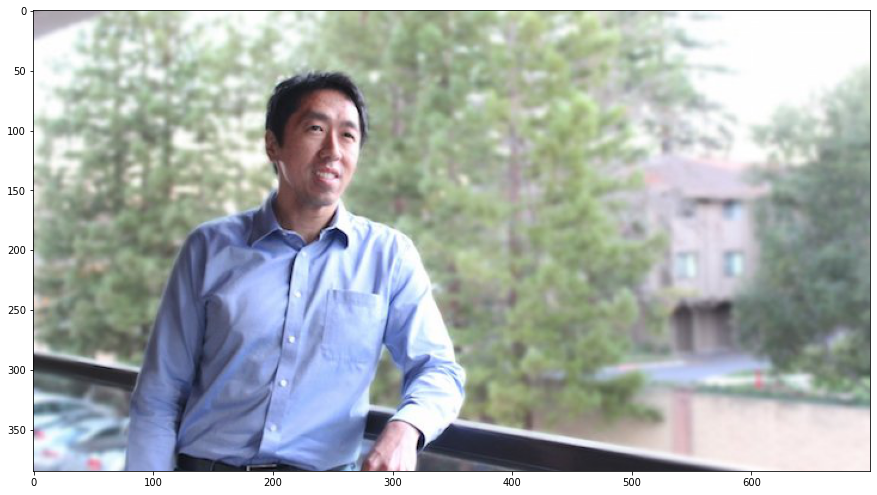

In [ ]:
img_path='andrew-ng1.jpg'
half = 0.5
image = Image.open(img_path)

image.resize([int(half * s) for s in image.size] )
plt.figure(figsize=(15, 10))
plt.imshow(image)
plt.show()

<p>We will create a transform object to convert the image to a tensor.</p>


In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

In [ ]:
img = transform(image)

<p>Let's print out our image:</p>

In [ ]:
img

tensor([[[0.5765, 0.5843, 0.5961,  ..., 0.9961, 0.9961, 0.9961],
         [0.6314, 0.6353, 0.6392,  ..., 0.9961, 0.9961, 0.9961],
         [0.6706, 0.6706, 0.6706,  ..., 0.9961, 0.9961, 0.9961],
         ...,
         [0.7020, 0.6980, 0.7020,  ..., 0.9765, 0.9765, 0.9804],
         [0.6784, 0.6745, 0.6824,  ..., 0.9804, 0.9804, 0.9843],
         [0.6275, 0.6392, 0.6471,  ..., 0.9804, 0.9804, 0.9804]],

        [[0.5490, 0.5569, 0.5686,  ..., 0.9961, 0.9961, 0.9961],
         [0.6039, 0.6078, 0.6118,  ..., 0.9961, 0.9961, 0.9961],
         [0.6431, 0.6431, 0.6431,  ..., 0.9961, 0.9961, 0.9961],
         ...,
         [0.7176, 0.7176, 0.7216,  ..., 0.9373, 0.9373, 0.9333],
         [0.6902, 0.6941, 0.7020,  ..., 0.9412, 0.9412, 0.9373],
         [0.6745, 0.6863, 0.6941,  ..., 0.9412, 0.9412, 0.9412]],

        [[0.5804, 0.5882, 0.6000,  ..., 0.9961, 0.9961, 0.9961],
         [0.6353, 0.6392, 0.6431,  ..., 0.9961, 0.9961, 0.9961],
         [0.6745, 0.6745, 0.6745,  ..., 0.9961, 0.9961, 0.

<p>We can make a prediction,The output is a dictionary with several predicted classes, the probability of belonging to that class and the coordinates of the bounding box corresponding to that class.</p>


In [ ]:
pred = model([img])

<p><b>note</b>:  if you call <code>model\_(\[img])</code>  directly but it will use more RAM</p>


In [ ]:
len(pred[0]['labels'])

2

we have the 2  different class predictions, ordered by likelihood scores for potential objects.


In [ ]:
pred[0]['labels']

tensor([ 1, 15])

We have the likelihood of each class:


In [ ]:
pred[0]['scores']

tensor([0.9994, 0.1343])

<p>The class number corresponds to the index of the list with the corresponding  category name.</p>


In [ ]:
index=pred[0]['labels'][0].item()
COCO_INSTANCE_CATEGORY_NAMES[index]

'person'

<p>We have the coordinates of the bounding box.</p>


In [ ]:
bounding_box=pred[0]['boxes'][0].tolist()
bounding_box

[76.90817260742188, 50.73971939086914, 365.50732421875, 380.4656677246094]

<p>These components correspond to the top-left corner and bottom-right corner of the rectangle, more precisely: <b>top(t), left(l), bottom(b), right(r).</b></p>

<p>We need to round them, otherwise we can't show it on picure.</p>

In [ ]:
t, l, r, b = [round(x) for x in bounding_box]
print(t, l, r, b)

77 51 366 380


We convert the tensor to an OpenCV array and plot an image with the box:


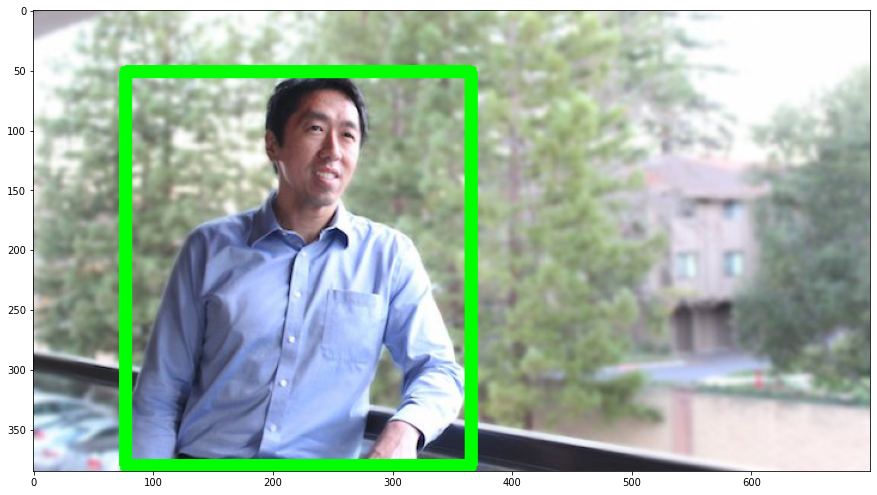

In [ ]:
img_plot=(np.clip(cv2.cvtColor(np.clip(img.numpy().transpose((1, 2, 0)), 0, 1), cv2.COLOR_RGB2BGR), 0, 1) * 255).astype(np.uint8)
cv2.rectangle(img_plot, (t, l), (r, b), (0, 255, 0), 10) # Draw Rectangle with the coordinates
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(img_plot, cv2.COLOR_BGR2RGB))
plt.show()
del img_plot, t, l, r, b

We can localize objects; we do this using the function <code>get_predictions</code>. The input  is the predictions <code>pred</code> and the <code>objects</code> you would like to localize.

<b>Loss equasion:</b>

$$||box\ - \hat{box}||^2 = (y_{min} - \hat{y_{min}})^2 + (y_{max} - \hat{y_{max}})^2 + (x_{min} - \hat{x_{min}})^2 + (x_{max} - \hat{x_{max}})^2$$

<br>


Label: person
Box coordinates: 77, 51, 366, 380
Probability: 0.9994052648544312


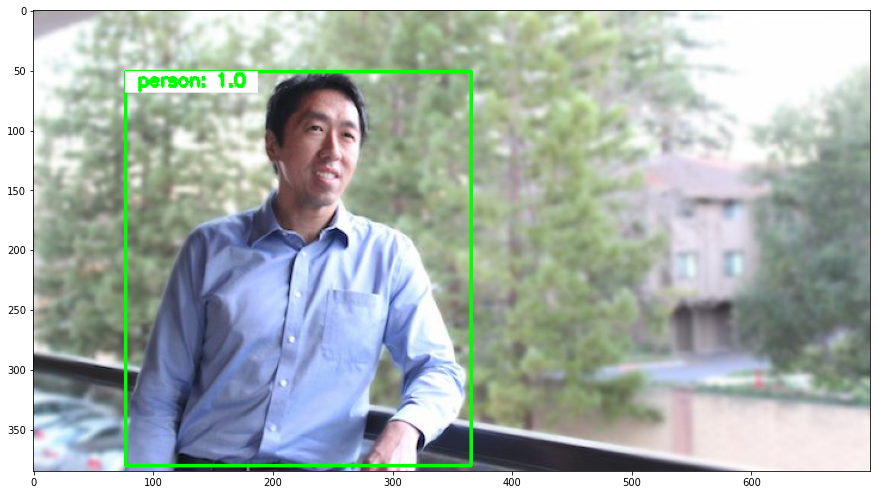

In [ ]:
pred_class=get_predictions(pred, objects="person")
draw_box(pred_class, img)

del pred_class

We can set a threshold <code>threshold</code>. Here we set the  threshold 1 i.e Here we set the  threshold 1 i.e. 100% likelihood.


In [ ]:
get_predictions(pred, threshold=1, objects="person")

[]

Here we have no output as the likelihood is not 100%.  Let's try a threshold of 0.98 and use the function  draw_box to draw the box and plot the class and it's rounded likelihood.



Label: person
Box coordinates: 77, 51, 366, 380
Probability: 0.9994052648544312


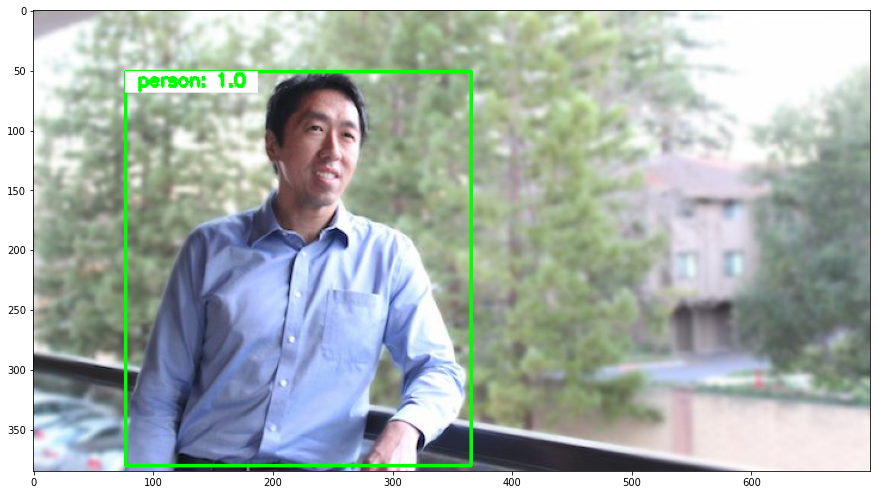

In [ ]:
pred_thresh=get_predictions(pred, threshold=0.98, objects="person")
draw_box(pred_thresh, img, download_image=True, img_name="andrew_BOX")
del pred_thresh

Delete objects to save memory, we will run this after every cell:


In [ ]:
save_RAM(image_=True)

We can locate multiple objects, consider the following <a href='https://www.kdnuggets.com/2015/03/talking-machine-deep-learning-gurus-p1.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera25797139-2021-01-01'>image</a>, we can detect the people in the image.


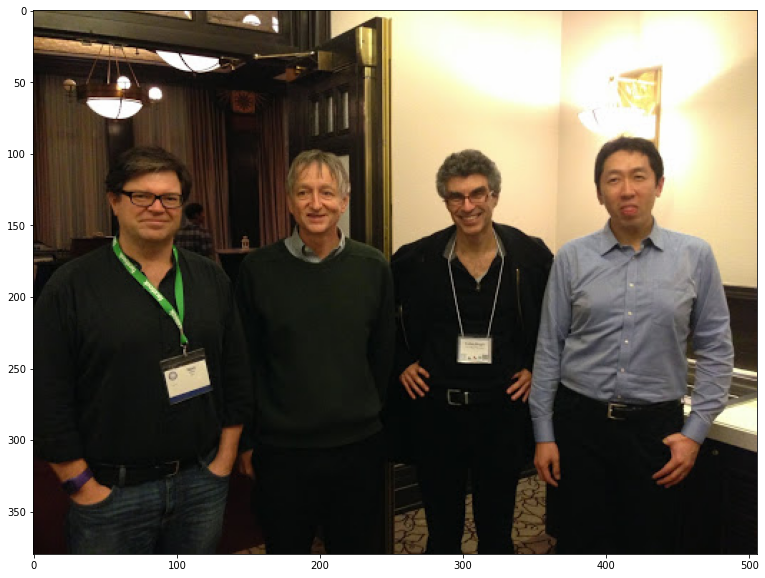

In [ ]:
img_path='DLguys.jpeg'
image = Image.open(img_path)
image.resize([int(half * s) for s in image.size])
plt.figure(figsize=(15, 10))
plt.imshow(np.array(image))
plt.show()

we can set a threshold to detect the object, 0.9 seems to work.



Label: person
Box coordinates: 347, 84, 495, 374
Probability: 0.9997990727424622

Label: person
Box coordinates: 250, 96, 365, 374
Probability: 0.999697208404541

Label: person
Box coordinates: 2, 95, 151, 369
Probability: 0.9996185302734375

Label: person
Box coordinates: 134, 94, 257, 377
Probability: 0.9995379447937012


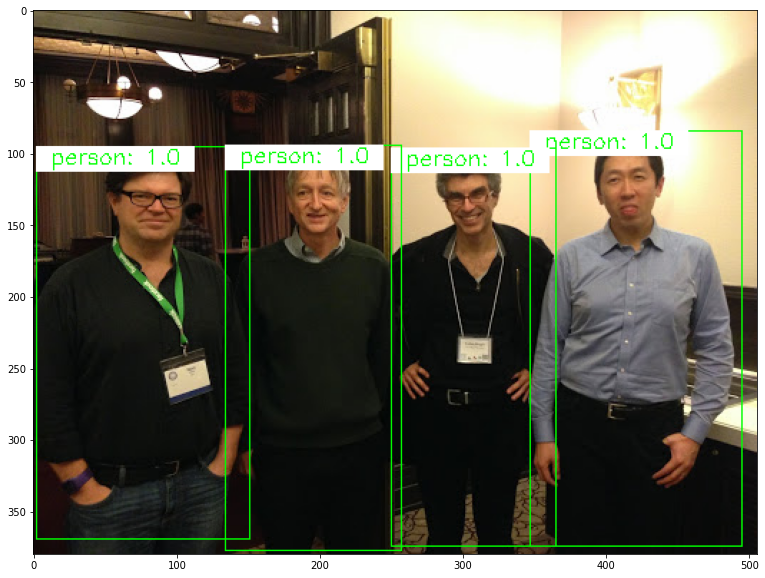

In [ ]:
img = transform(image)
pred = model([img])
pred_thresh=get_predictions(pred, threshold=0.8)
draw_box(pred_thresh, img, rect_th=1, text_size= 0.5, text_th=1)

del pred_thresh

Or we can use objects parameter:



Label: person
Box coordinates: 347, 84, 495, 374
Probability: 0.9997990727424622

Label: person
Box coordinates: 250, 96, 365, 374
Probability: 0.999697208404541

Label: person
Box coordinates: 2, 95, 151, 369
Probability: 0.9996185302734375

Label: person
Box coordinates: 134, 94, 257, 377
Probability: 0.9995379447937012


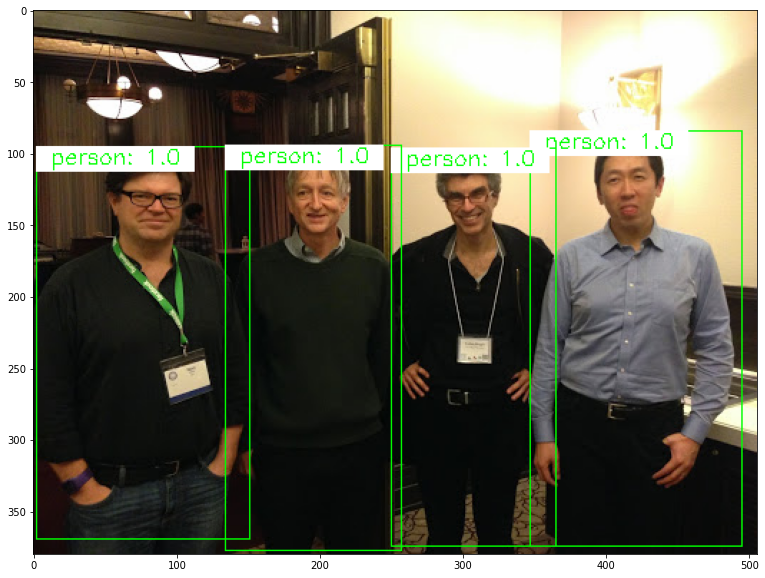

In [ ]:
pred_obj=get_predictions(pred,objects="person")
draw_box(pred_obj, img, rect_th=1,text_size= 0.5, text_th=1, download_image=True, img_name="dl_guys_IBM_BOX")

del pred_obj

If we set the threshold too low, we will detect objects that are not there.



Label: person
Box coordinates: 347, 84, 495, 374
Probability: 0.9997990727424622

Label: person
Box coordinates: 250, 96, 365, 374
Probability: 0.999697208404541

Label: person
Box coordinates: 2, 95, 151, 369
Probability: 0.9996185302734375

Label: person
Box coordinates: 134, 94, 257, 377
Probability: 0.9995379447937012

Label: person
Box coordinates: 101, 134, 129, 175
Probability: 0.7980290055274963

Label: person
Box coordinates: 104, 134, 123, 156
Probability: 0.38920849561691284

Label: bottle
Box coordinates: 145, 157, 151, 167
Probability: 0.38045552372932434

Label: sink
Box coordinates: 472, 266, 505, 306
Probability: 0.354780912399292

Label: handbag
Box coordinates: 57, 161, 129, 291
Probability: 0.262006551027298

Label: chair
Box coordinates: 26, 158, 55, 171
Probability: 0.231123685836792

Label: handbag
Box coordinates: 51, 159, 117, 240
Probability: 0.223515123128891

Label: book
Box coordinates: 88, 237, 126, 277
Probability: 0.21592430770397186

Label: backpack
Box

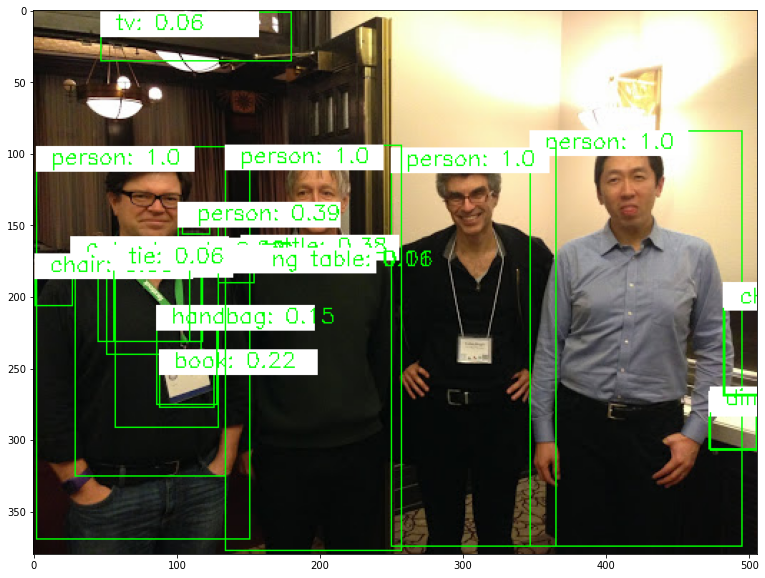

In [ ]:
pred_thresh=get_predictions(pred,threshold=0.01)
draw_box(pred_thresh, img, rect_th= 1, text_size=0.5, text_th=1)

del pred_thresh

the following lines will speed up your code by using less RAM.


In [ ]:
save_RAM(image_=True)

## Object Detection


In Object Detection we find the classes as well detect the objects in an image. Consider the following <a href="https://www.dreamstime.com/stock-image-golden-retriever-puppy-lying-parakeet-perched-its-head-weeks-old-next-to-british-shorthair-kitten-sitting-image30336051?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera25797139-2021-01-01">image</a>


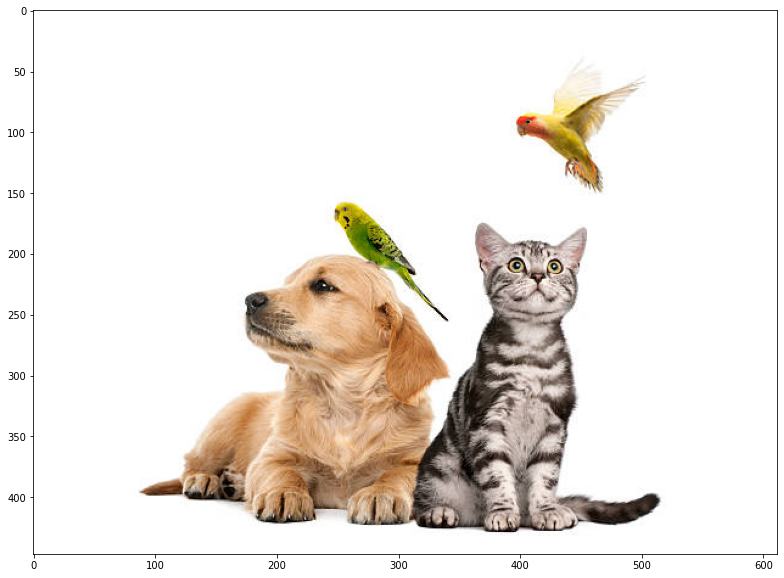

In [ ]:
img_path='istockphoto-187786732-612x612.jpeg'
image = Image.open(img_path)
image.resize( [int(half * s) for s in image.size])
plt.figure(figsize=(15, 10))
plt.imshow(np.array(image))
plt.show()
del img_path

If we set a threshold, we can detect all objects whose likelihood is above that threshold.



Label: bird
Box coordinates: 396, 41, 500, 147
Probability: 0.9976320266723633

Label: cat
Box coordinates: 299, 167, 459, 437
Probability: 0.997433602809906

Label: dog
Box coordinates: 112, 191, 345, 421
Probability: 0.9929459691047668

Label: bird
Box coordinates: 244, 160, 337, 264
Probability: 0.9781111478805542


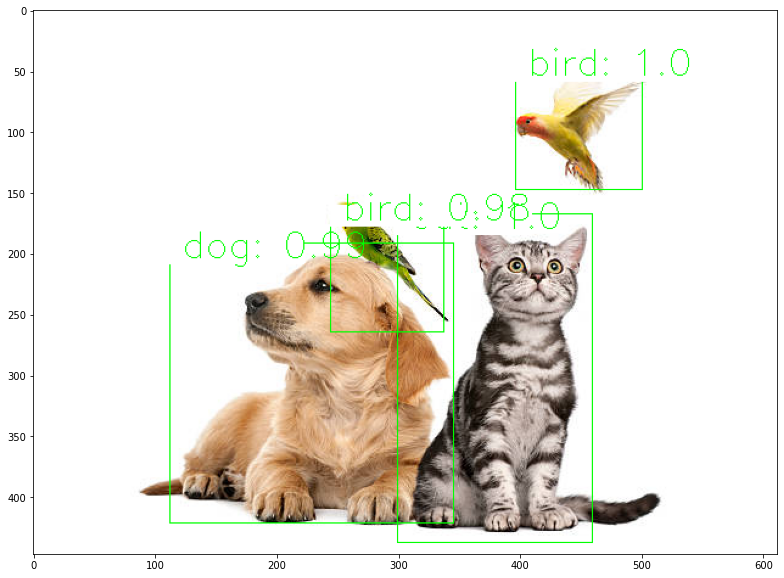

In [ ]:
img = transform(image)
pred = model([img])
pred_thresh=get_predictions(pred,threshold=0.97)
draw_box(pred_thresh,img,rect_th=1, text_size=1, text_th=1, download_image=True, img_name="dog_cat_bird_BOX")

del pred_thresh

We can specify the objects we would like to classify, for example, cats and dogs:



Label: cat
Box coordinates: 299, 167, 459, 437
Probability: 0.997433602809906

Label: dog
Box coordinates: 112, 191, 345, 421
Probability: 0.9929459691047668


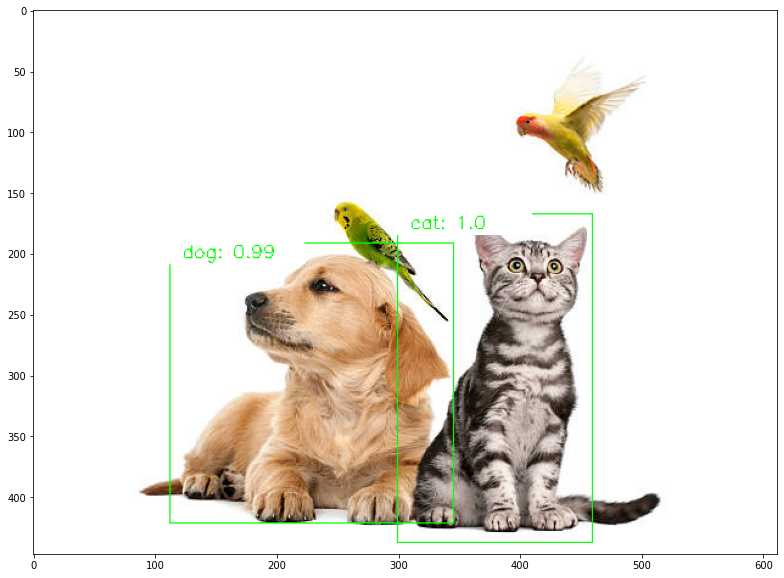

In [ ]:
# img = transform(image)
# pred = model([img])
pred_obj=get_predictions(pred, objects=["dog","cat"])
draw_box(pred_obj, img,rect_th=1, text_size= 0.5, text_th=1)
del pred_obj

If we set the threshold too low, we may detect objects with a low likelihood of being correct; here, we set the threshold to 0.7, and we incorrectly  detect a cat



Label: cat
Box coordinates: 299, 167, 459, 437
Probability: 0.997433602809906

Label: dog
Box coordinates: 112, 191, 345, 421
Probability: 0.9929459691047668

Label: cat
Box coordinates: 111, 181, 392, 423
Probability: 0.7116268277168274


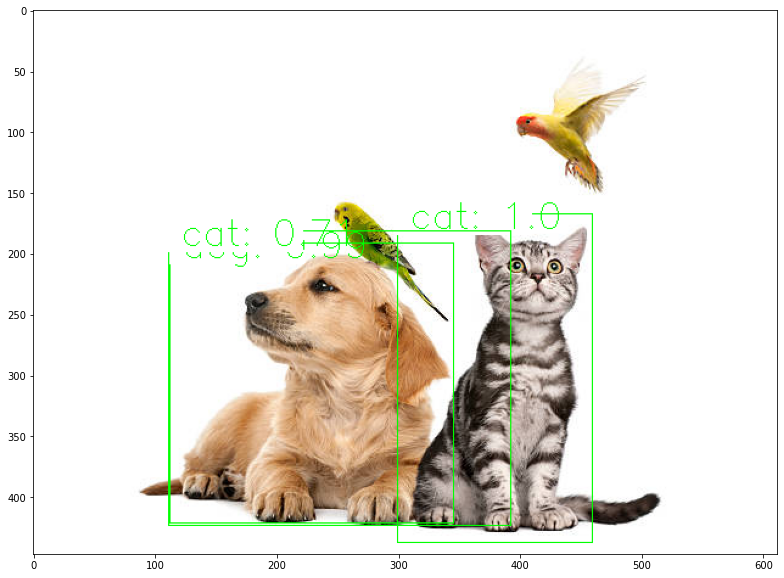

In [ ]:
# img = transform(image)
# pred = model([img])
pred_thresh=get_predictions(pred, threshold=0.70, objects=["dog", "cat"])
draw_box(pred_thresh, img, rect_th= 1, text_size=1, text_th=1)

del pred_thresh

In [ ]:
save_RAM(image_=True)

We can detect other objects. Consider the following <a href='https://www.flickr.com/photos/watts_photos/27581126637?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera25797139-2021-01-01'>image</a>; We can detect cars and airplanes


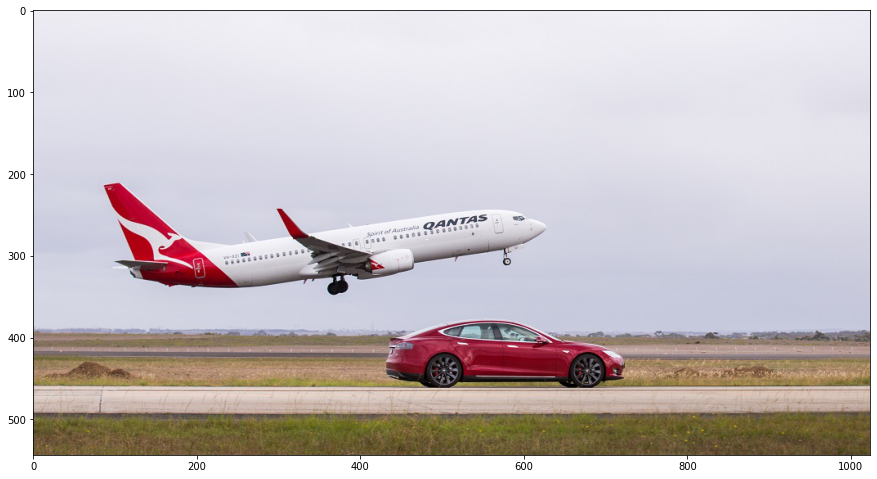

In [ ]:
img_path='quantas-car-v-plane-TAKE-OFF.jpg'
image = Image.open(img_path)
image.resize( [int(half * s) for s in image.size])
plt.figure(figsize=(15, 10))
plt.imshow(np.array(image))
plt.show()
del img_path


Label: car
Box coordinates: 433, 377, 723, 460
Probability: 0.9993621706962585

Label: airplane
Box coordinates: 62, 213, 614, 351
Probability: 0.9987056255340576


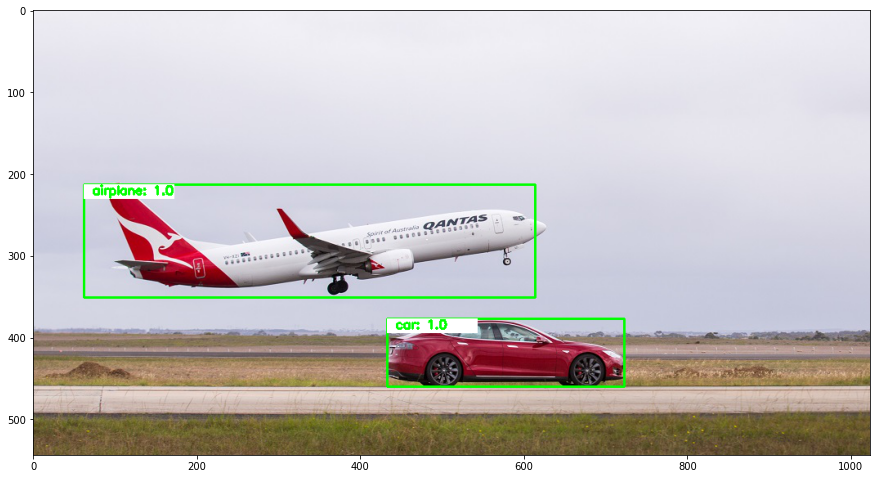

In [ ]:
img = transform(image)
pred = model([img])
pred_thresh=get_predictions(pred, threshold=0.997)
draw_box(pred_thresh, img, download_image=True, img_name="car_plane_BOX")
del pred_thresh

In [ ]:
save_RAM(image_=True)

<br>

<a id="test_model_uploaded"></a>

<h2 align=center>Test Model With an Uploaded Image</h2>

Replace with the name of your image as seen in your directory into <code>img_path</code> variable.


In [ ]:
from pathlib import Path
print("Directory Path:", Path().absolute())

Directory Path: /content


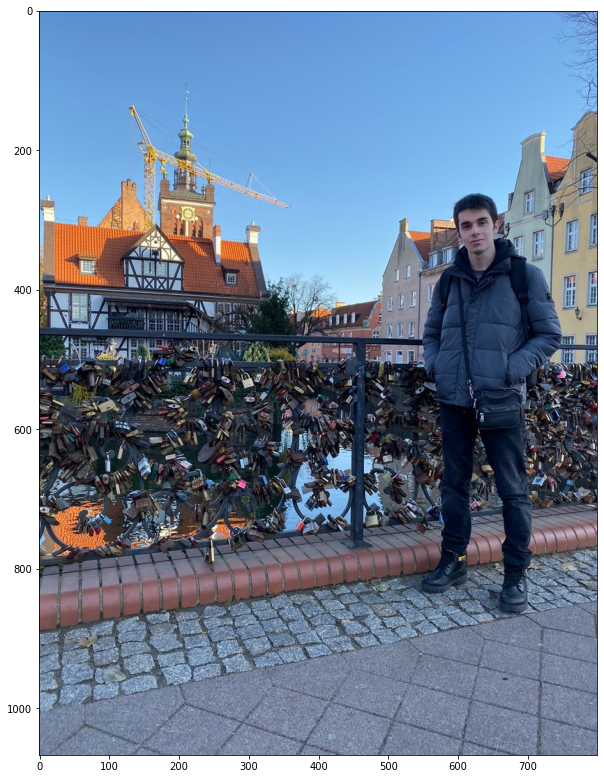

In [ ]:
img_path = str(Path().absolute())+'/me.jpg'
image = Image.open(img_path)
plt.figure(figsize=(10, 15))
plt.imshow(np.array(image))
plt.show()


Label: person
Box coordinates: 544, 262, 745, 844
Probability: 0.999521017074585


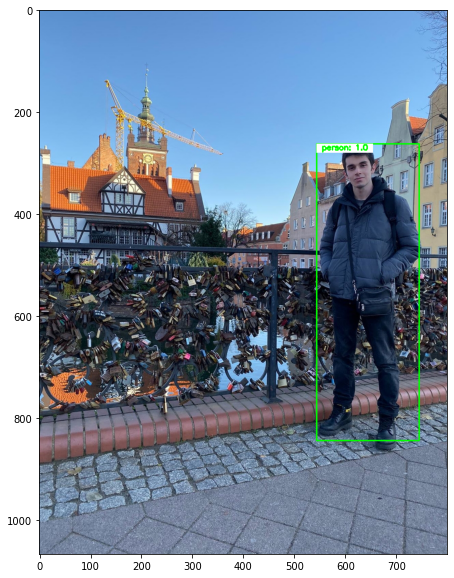

In [ ]:
img = transform(image )
pred = model(img.unsqueeze(0))
pred_thresh=get_predictions(pred,threshold=0.95)
draw_box(pred_thresh, img, download_image=True, img_name="me_BOX")

<br>

<h1>Contact Me<h1>
<p>If you have something to say to me please contact me:</p>

<ul>
  <li>Twitter: <a href="https://twitter.com/Doguilmak">Doguilmak</a></li>
  <li>Mail address: doguilmak@gmail.com</li>
</ul>

In [1]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2022-10-03 22:27:30
